In [76]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
np.random.seed(2)
import os
from pathlib import Path
path_to_desktop = Path.home() / 'Desktop' / 'programming_for_econ' / 'exam'
os.chdir(path_to_desktop)


from scipy.optimize import minimize
import quantecon as qe
import warnings
warnings.filterwarnings('ignore')

# Section A1
## Question 1

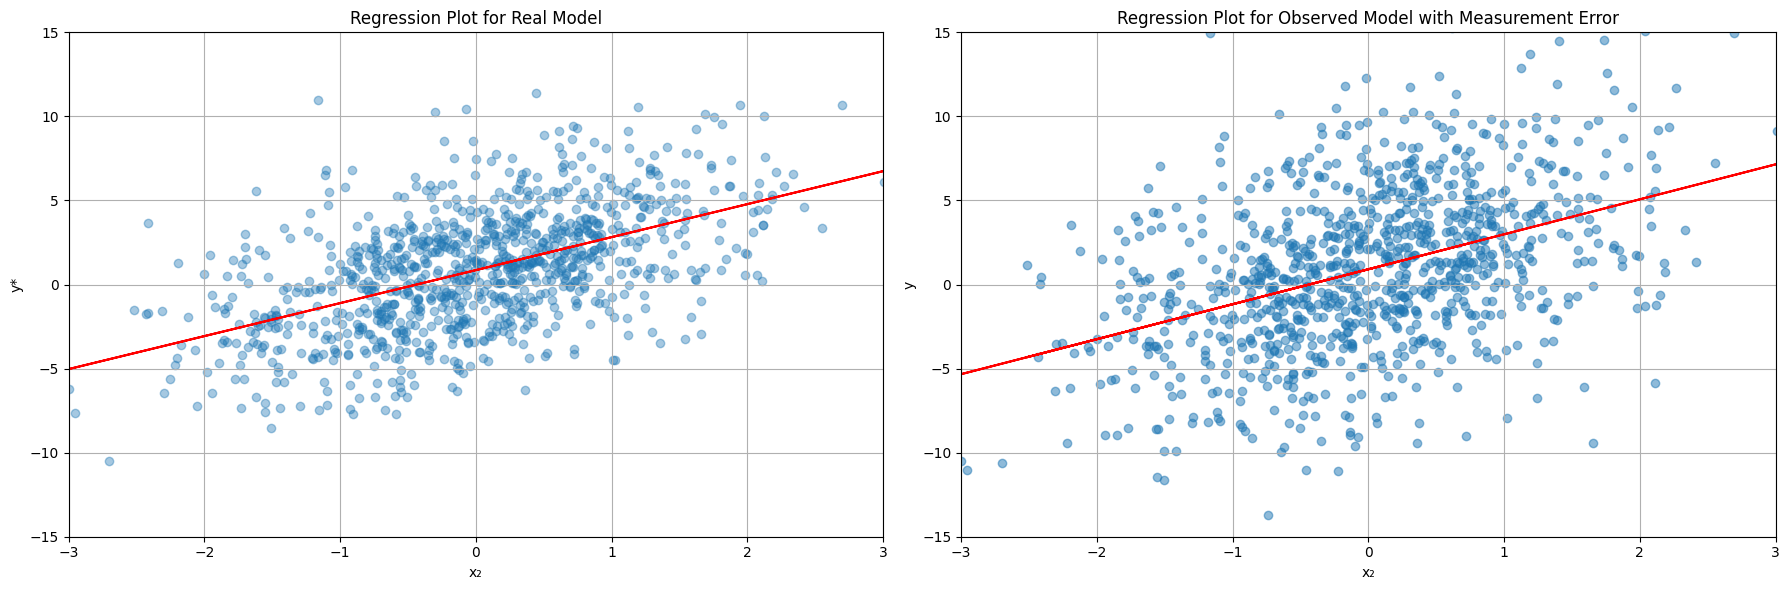

In [77]:
beta_0, beta_1 = 1, 2
sigma_squared, sigma = 9, 3

N = 1000

error = np.random.normal(0, sigma, N)
x_2 = np.random.normal(0, 1, N)
y_star = beta_0 + beta_1 * x_2 + error

sigma_v_squared, sigma_v = 9, 3
v = np.random.normal(0, sigma_v, N)
y = y_star + v

x_with_intercept = sm.add_constant(x_2)
ols_star = sm.OLS(y_star, x_with_intercept).fit()
x = sm.add_constant(x_2)  
ols = sm.OLS(y, x_with_intercept).fit()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].scatter(x_2, y_star, alpha=0.4, label='Real Model')
axes[0].plot(x_2, ols_star.predict(x_with_intercept), color='red', label='OLS Regression Line')
axes[0].set_title('Regression Plot for Real Model')
axes[0].set_xlabel('x\u2082')
axes[0].set_ylabel('y*')
axes[0].set_xlim(-3,3)
axes[0].set_ylim(-15, 15)
axes[0].grid(True)

axes[1].scatter(x_2, y, alpha=0.5, label='Observed Model')
axes[1].plot(x_2, ols.predict(x), color='red', label='OLS Regression Line')
axes[1].set_title('Regression Plot for Observed Model with Measurement Error')
axes[1].set_xlabel('x\u2082')
axes[1].set_ylabel('y')
axes[1].set_xlim(-3,3)
axes[1].set_ylim(-15, 15)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [78]:
print("The Real Model")
print(ols_star.summary())


The Real Model
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     401.9
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.16e-75
Time:                        07:52:50   Log-Likelihood:                -2521.8
No. Observations:                1000   AIC:                             5048.
Df Residuals:                     998   BIC:                             5057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8560      0.095     

In [79]:
print("The Observed Model with Measurement Error")
print(ols.summary())


The Observed Model with Measurement Error
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           9.46e-46
Time:                        07:52:50   Log-Likelihood:                -2873.4
No. Observations:                1000   AIC:                             5751.
Df Residuals:                     998   BIC:                             5761.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

From the data we see that there is a not a significant difference in the value of $\beta_0$ and $\beta_1$ when we include measurement error.

## Question 2

The β₀ mean is, 0.99
The β₁ mean is, 2.0
The estimator for β₁ appears to be unbiased.
The measured variance of β₁ is, 0.19.
The true variance of β₁ is, 0.1.


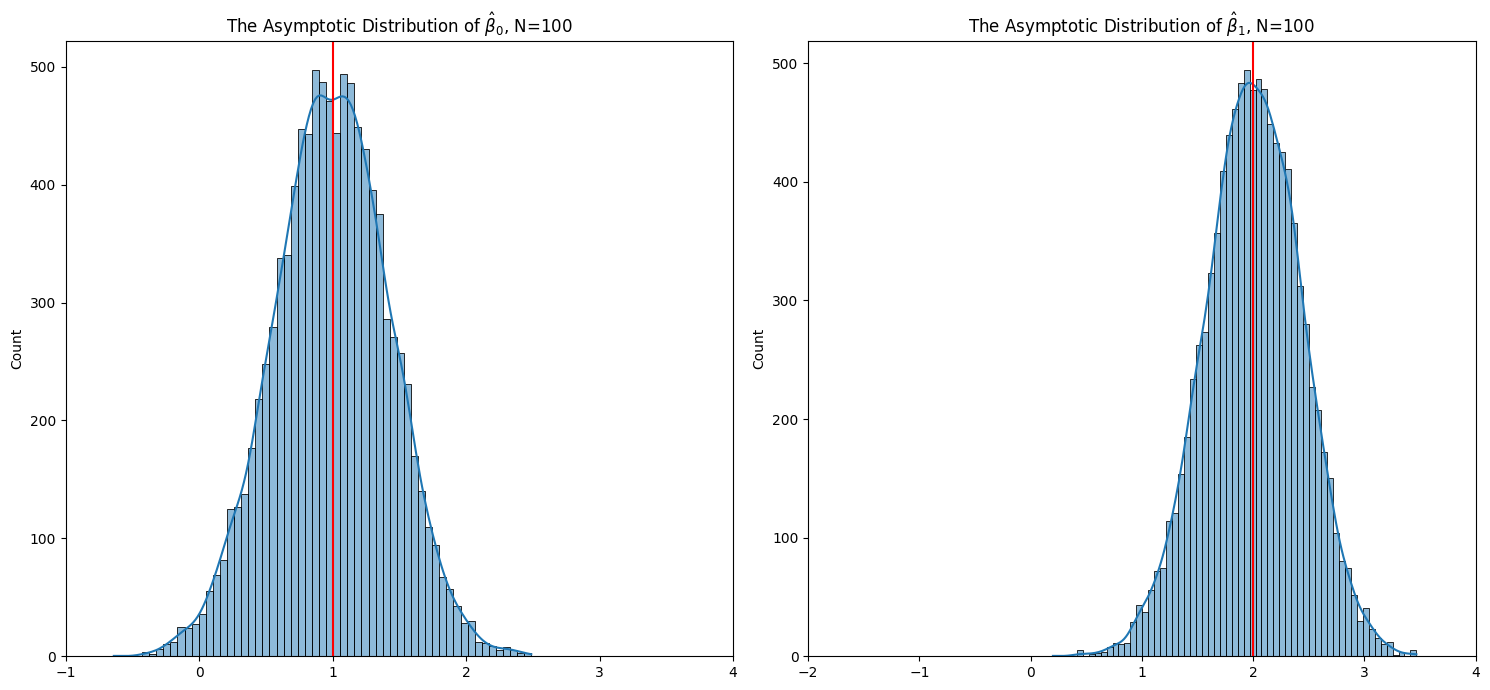

In [80]:
N = 100
N_simulation = 10000


beta_0_simulation = []
beta_1_simulation = []

for i in range(N_simulation):
    x2 = np.random.normal(0, 1, N)
    e = np.random.normal(0, sigma, N)
    v = np.random.normal(0, sigma_v, N)

    yistar = beta_0 + beta_1 * x2 + e
   
    yi = yistar + v
   
    X = sm.add_constant(x2) 
    ols1 = sm.OLS(yi, X).fit()
   
    beta_0_simulation.append(ols1.params[0])
    beta_1_simulation.append(ols1.params[1])

beta_0_mean = np.mean(beta_0_simulation)
beta_1_mean = np.mean(beta_1_simulation)

true_var = sigma ** 2 / np.sum(x2 ** 2)

print(f'The β₀ mean is, {round(beta_0_mean, 2)}')
print(f'The β₁ mean is, {round(beta_1_mean, 2)}')

if abs(beta_1_mean - beta_1) < 0.01:
    print("The estimator for β₁ appears to be unbiased.")
elif beta_1_mean > beta_1:
    print("The estimator for β₁ appears to be biased upwards.")
else:
    print("The estimator for β₁ appears to be biased downwards.")

var_beta_1 = np.var(beta_1_simulation)

print(f'The measured variance of β₁ is, {round(var_beta_1, 2)}.')
print(f'The true variance of β₁ is, {round(true_var, 2)}.')

betas_sim_array = np.column_stack((beta_0_simulation, beta_1_simulation))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.histplot(betas_sim_array[:,0], ax=axes[0], kde=True)
axes[0].set_xlim((-1, 4))
axes[0].axvline(x=1.0, color='r')
axes[0].set_title(r'The Asymptotic Distribution of $\hat{\beta}_0$, N=' + str(N))

sns.histplot(betas_sim_array[:,1], ax=axes[1], kde=True)
axes[1].set_xlim((-2, 4))
axes[1].axvline(x=2, color='r')
axes[1].set_title(r'The Asymptotic Distribution of $\hat{\beta}_1$, N=' + str(N))

plt.tight_layout()
plt.show()


From the result it shows that $\beta_1$ in unbiased however compared to the model without estimate error it has greater variance around the value of $\beta_1$.

## Question 3

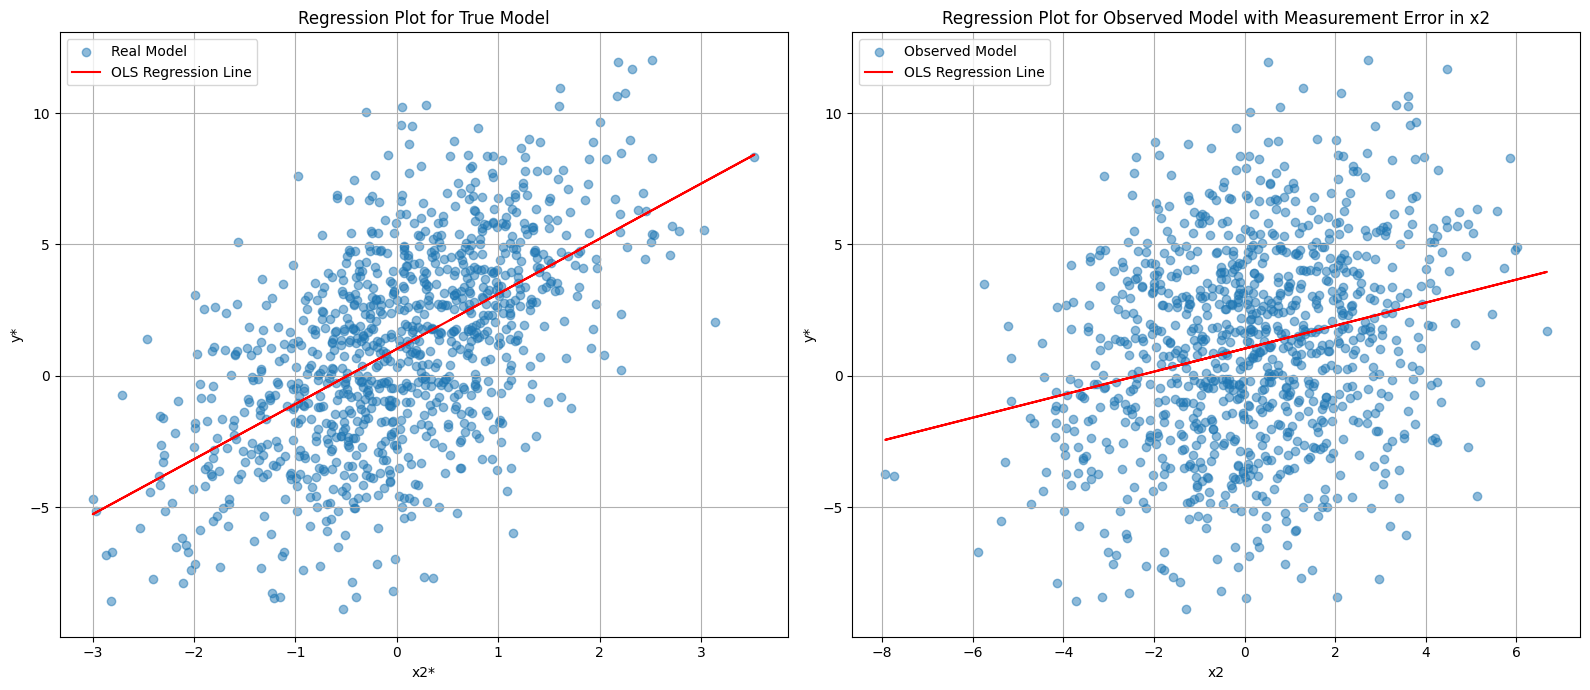

In [81]:
N = 1000
sigma_squared_u, sigma_u = 4, 2

x2_star = np.random.normal(0, 1, N)

y_star = beta_0 + beta_1 * x2_star + np.random.normal(0, sigma_v,  N)

u = np.random.normal(0, sigma_u, N)
x2 = x2_star + u

X_star = sm.add_constant(x2_star)
ols_star = sm.OLS(y_star, X_star).fit()

X = sm.add_constant(x2)
ols = sm.OLS(y_star, X).fit()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

axes[0].scatter(x2_star, y_star, alpha=0.5, label='Real Model')
axes[0].plot(x2_star, ols_star.predict(X_star), color='red', label='OLS Regression Line')
axes[0].set_title('Regression Plot for True Model')
axes[0].set_xlabel('x2*')
axes[0].set_ylabel('y*')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(x2, y_star, alpha=0.5, label='Observed Model')
axes[1].plot(x2, ols.predict(X), color='red', label='OLS Regression Line')
axes[1].set_title('Regression Plot for Observed Model with Measurement Error in x2')
axes[1].set_xlabel('x2')
axes[1].set_ylabel('y*')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [82]:
print("The Real Model")
print(ols_star.summary())

The Real Model
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     482.6
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.44e-87
Time:                        07:52:52   Log-Likelihood:                -2563.1
No. Observations:                1000   AIC:                             5130.
Df Residuals:                     998   BIC:                             5140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0230      0.099     

In [83]:
print("The Observed Model with Measurement Error in x2")
print(ols.summary())

The Observed Model with Measurement Error in x2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     66.15
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.23e-15
Time:                        07:52:52   Log-Likelihood:                -2728.2
No. Observations:                1000   AIC:                             5460.
Df Residuals:                     998   BIC:                             5470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

From the graphs it is very evident, but the data also backs up that there now is a signifcant difference between the values of $\beta_0$ and $\beta_1$ between the real model and the model with measurement error.

## Question 4

0.400284590943288
The β₀ mean is, 1.0.
The β₁ mean is, 0.4.
The estimator for β₁ appears to be biased downwards.
The measured variance of β₁ is, 0.0.
The true variance of β₁ is, 0.0.


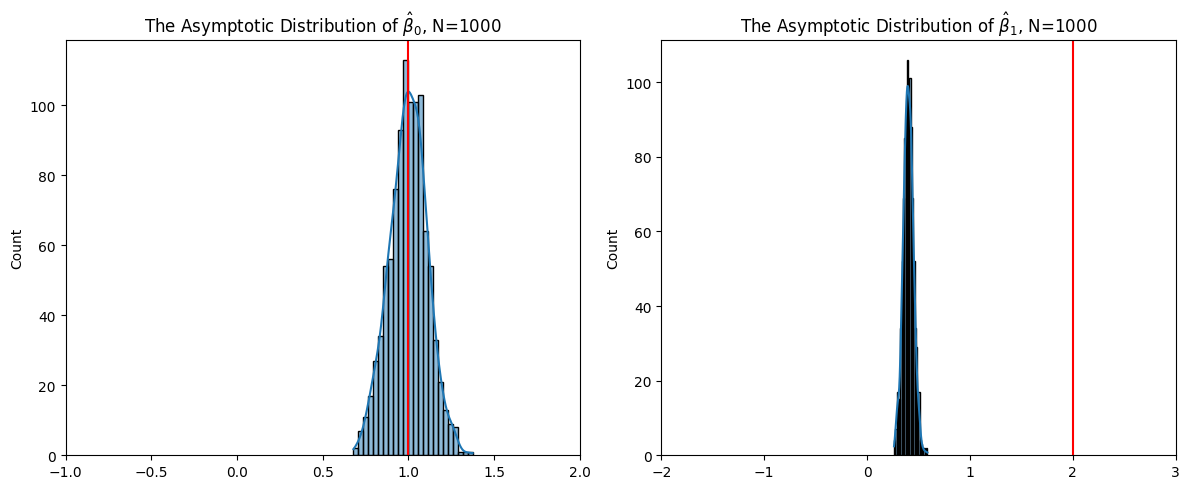

In [84]:
N = 1000
N_simulation = 1000


beta_0_simulation = []
beta_1_simulation = []
betas_simulation = np.zeros(N_simulation)

for i in range(N_simulation):
    x2_star = np.random.normal(0, 1, N)
    y_star = beta_0 + beta_1 * x2_star + np.random.normal(0, sigma, N)  # True y

    u = np.random.normal(0, sigma_u, N)
    x2 = x2_star + u

    X = sm.add_constant(x2)
    ols = sm.OLS(y_star, X).fit()

    betas_simulation[i] = ols.params[1]
    beta_0_simulation.append(ols.params[0])
    beta_1_simulation.append(ols.params[1])

beta_0_mean = np.mean(beta_0_simulation)
beta_1_mean = np.mean(beta_1_simulation)
print(beta_1_mean)
var_B1 = np.var(beta_1_simulation)

true_var = sigma**2 / np.sum(x2 ** 2)


print(f'The β₀ mean is, {round(beta_0_mean, 2)}.')
print(f'The β₁ mean is, {round(beta_1_mean, 2)}.')

if abs(beta_1_mean - beta_1) < 0.01:
    print("The estimator for β₁ appears to be unbiased.")
elif beta_1_mean > beta_1:
    print("The estimator for β₁ appears to be biased upwards.")
else:
    print("The estimator for β₁ appears to be biased downwards.")

var_beta_1 = np.var(beta_1_simulation)

print(f'The measured variance of β₁ is, {round(var_B1, 2)}.')
print(f'The true variance of β₁ is, {round(true_var, 2)}.')
   
beta_0_sim_array = np.array(beta_0_simulation)
beta_1_sim_array = np.array(beta_1_simulation)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for Beta_0
sns.histplot(beta_0_sim_array, ax=axes[0], kde=True)
axes[0].set_xlim((-1, 2))
axes[0].axvline(x=1.0, color='r')
axes[0].set_title(r'The Asymptotic Distribution of $\hat{\beta}_0$, N=' + str(N))

# Plot for Beta_1
sns.histplot(beta_1_sim_array, ax=axes[1], kde=True)
axes[1].set_xlim((-2, 3))
axes[1].axvline(x=2, color='r')
axes[1].set_title(r'The Asymptotic Distribution of $\hat{\beta}_1$, N=' + str(N))

# Adjust layout
plt.tight_layout()
plt.show()

We can now see from the graph and the data that $\hat\beta_1$ is now biased downwards, this is also very evident from the graph.

# Section A2
## Question 1

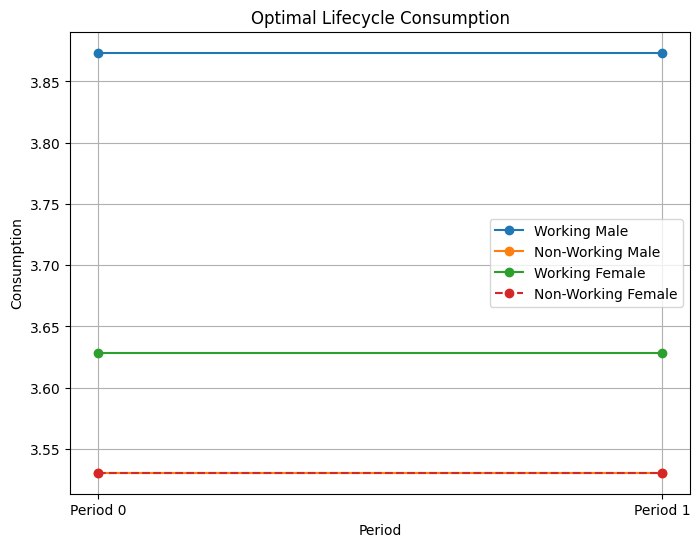

In [85]:
# Model Parameters
β = 0.96
r = (1/β) - 1
ψ = 0.3
y_0m, y_1m, η_m, w_m = 5, 2, 0.5, 1
y_0f, y_1f, η_f, w_f = 5, 2, 0.6, 0.5

def optimality(gender, labour):
    y_0, y_1, η, w = (y_0m, y_1m, η_m, w_m) if gender == 'male' else (y_0f, y_1f, η_f, w_f)
    if labour == 1:  # working
        c_0 = (w + y_1 + y_0*(1+r) - ψ) / ((1+r)*(1+β))
        c_1 = (β / (1+β)) * (w + y_1 + y_0*(1+r) - ψ)
    else:  # non-working
        c_0 = (y_1 + y_0*(1+r)) / ((1+r)*(1+β))
        c_1 = (β / (1+β)) * (y_1 + y_0*(1+r))
    return c_0, c_1

c0_working_male, c1_working_male = optimality('male', 1)
c0_non_working_male, c1_non_working_male = optimality('male', 0)
c0_working_female, c1_working_female = optimality('female', 1)
c0_non_working_female, c1_non_working_female = optimality('female', 0)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [c0_working_male, c1_working_male], label='Working Male', marker='o')
plt.plot([0, 1], [c0_non_working_male, c1_non_working_male], label='Non-Working Male', marker='o')
plt.plot([0, 1], [c0_working_female, c1_working_female], label='Working Female', marker='o')
plt.plot([0, 1], [c0_non_working_female, c1_non_working_female], label='Non-Working Female', marker='o', linestyle='--')

plt.xlabel('Period')
plt.ylabel('Consumption')
plt.title('Optimal Lifecycle Consumption')
plt.xticks([0, 1], ['Period 0', 'Period 1'])
plt.legend()
plt.grid(True)
plt.show()


Where the lines non working male and female are drawn on top of eachother, to try and make this clearer to see I have made the line for non-working female dashed. We see that there is no change in the lifecycle consumption, but this was due to the question set up and the lagrangian, from the realtion between $\beta$ and $r$.

## Question 2

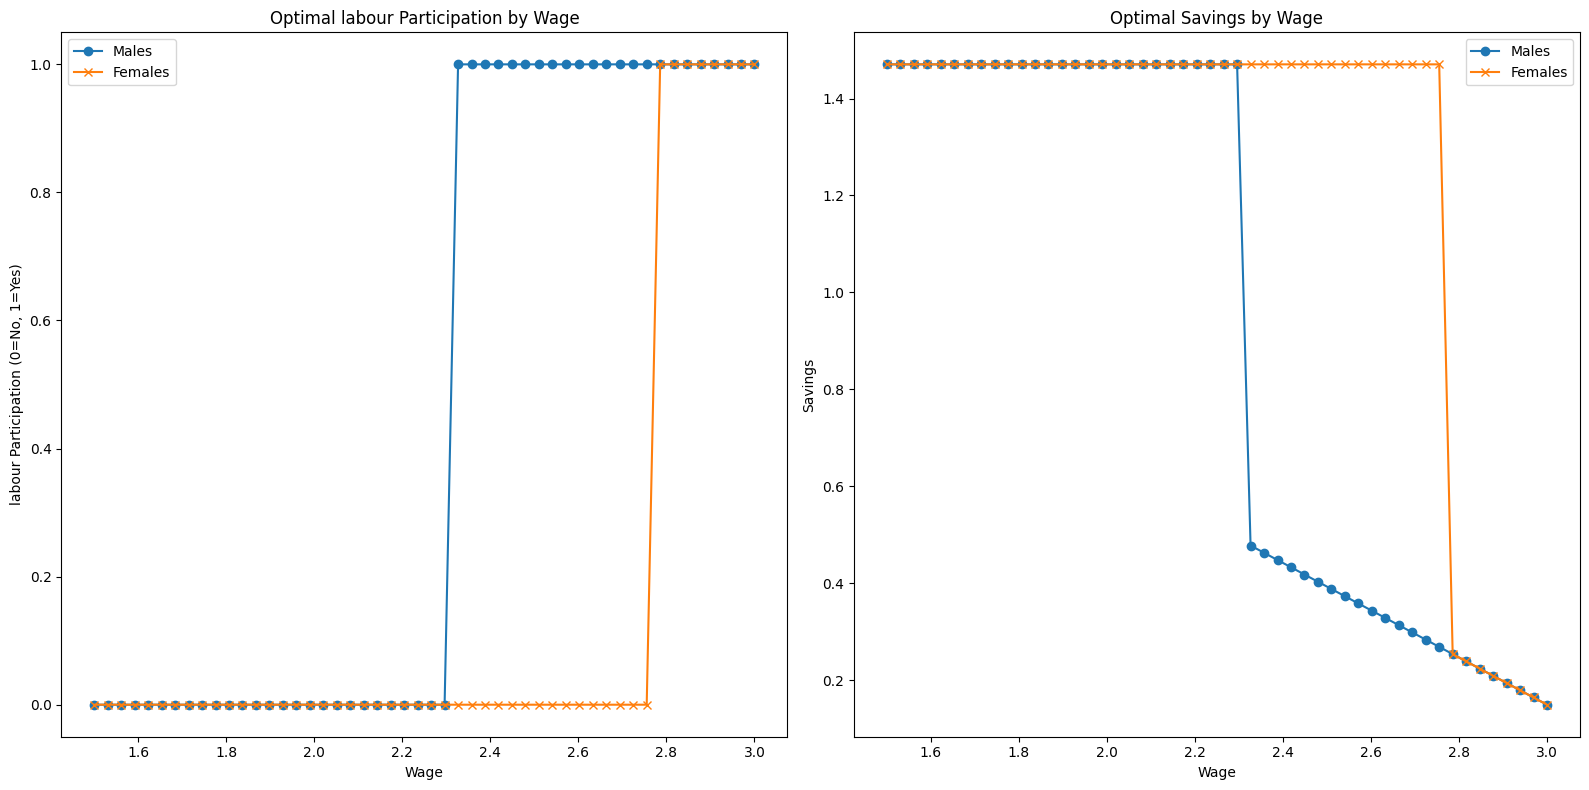

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set model parameters
param_dict = {
    'beta': 0.96,
    'psi': 0.3,
    'initial_income': {'male': 5, 'female': 5},
    'final_income': {'male': 2, 'female': 2},
    'efficiency': {'male': 0.5, 'female': 0.6},
    'wage': {'male': 1, 'female': 0.5}
}

param_dict['r'] = (1 / param_dict['beta']) - 1

# Define utility functions
def utility_0(consumption_0):
    return np.log(consumption_0)

def utility_1(consumption_1, labour, efficiency):
    return np.log(consumption_1) - efficiency * labour

# Define budget constraints
def budget_constraints(params, wage, initial_income, final_income, psi, r, labour):
    c_0, c_1, a_1 = params
    return [
        c_0 + a_1 - initial_income,  # Budget constraint at t=0
        (c_1 + psi * labour) - (wage * labour + final_income + (1 + r) * a_1)  # Budget constraint at t=1
    ]

# Define objective function for optimization
def objective(params, wage, initial_income, final_income, psi, r, labour, efficiency):
    c_0, c_1, a_1 = params
    total_utility = utility_0(c_0) + param_dict['beta'] * utility_1(c_1, labour, efficiency)
    return -total_utility  # Minimize the negative utility for maximization


def solve_optimization(wage, initial_income, final_income, efficiency, labour):
    initial_guess = [initial_income / 2, (final_income + (1 + param_dict['r']) * initial_income / 2) / 2, initial_income / 2]
    bounds = [(0, None), (0, None), (None, None)]
    result = minimize(
        objective,
        initial_guess,
        args=(wage, initial_income, final_income, param_dict['psi'], param_dict['r'], labour, efficiency),
        constraints={'type': 'eq', 'fun': budget_constraints, 'args': (wage, initial_income, final_income, param_dict['psi'], param_dict['r'], labour)},
        bounds=bounds
    )
    return result.x if result.success else None




def determine_labour_participation(wage, initial_income, final_income, efficiency):
    solution_work = solve_optimization(wage, initial_income, final_income, efficiency, labour=1)
    solution_nowork = solve_optimization(wage, initial_income, final_income, efficiency, labour=0)
    utility_work = -objective(solution_work, wage, initial_income, final_income, param_dict['psi'], param_dict['r'], labour=1, efficiency=efficiency)
    utility_nowork = -objective(solution_nowork, wage, initial_income, final_income, param_dict['psi'], param_dict['r'], labour=0, efficiency=efficiency)
    if utility_work >= utility_nowork:
        return 1, solution_work  # Choose to work
    else:
        return 0, solution_nowork  # Choose not to work

wage_grid = np.linspace(1.5, 3, 50)


optimal_labour_m = []
optimal_savings_m = []
optimal_labour_f = []
optimal_savings_f = []


for wage in wage_grid:
    labour_decision, solution = determine_labour_participation(wage, param_dict['initial_income']['male'], param_dict['final_income']['male'], param_dict['efficiency']['male'])
    optimal_labour_m.append(labour_decision)
    optimal_savings_m.append(solution[2] if solution is not None else np.nan)

for wage in wage_grid:
    labour_decision, solution = determine_labour_participation(wage, param_dict['initial_income']['female'], param_dict['final_income']['female'], param_dict['efficiency']['female'])
    optimal_labour_f.append(labour_decision)
    optimal_savings_f.append(solution[2] if solution is not None else np.nan)

optimal_labour_m = np.array(optimal_labour_m)
optimal_savings_m = np.array(optimal_savings_m)
optimal_labour_f = np.array(optimal_labour_f)
optimal_savings_f = np.array(optimal_savings_f)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(wage_grid, optimal_labour_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_labour_f, label='Females', marker='x')
plt.title('Optimal labour Participation by Wage')
plt.xlabel('Wage')
plt.ylabel('labour Participation (0=No, 1=Yes)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(wage_grid, optimal_savings_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_savings_f, label='Females', marker='x')
plt.title('Optimal Savings by Wage')
plt.xlabel('Wage')
plt.ylabel('Savings')
plt.legend()

plt.tight_layout()
plt.show()


In the left-hand graph, we observe that males tend to exhibit a lower reservation wage, approximately around 2.3, compared to females, whose reservation wage appears to be approximately 2.8. Furthermore, from the right hand graph it's notable that males tend to have lower optimal savings across various wage levels, and intriguingly, this shift in savings coincides with the point where the reservation wages diverge.

## Question 3

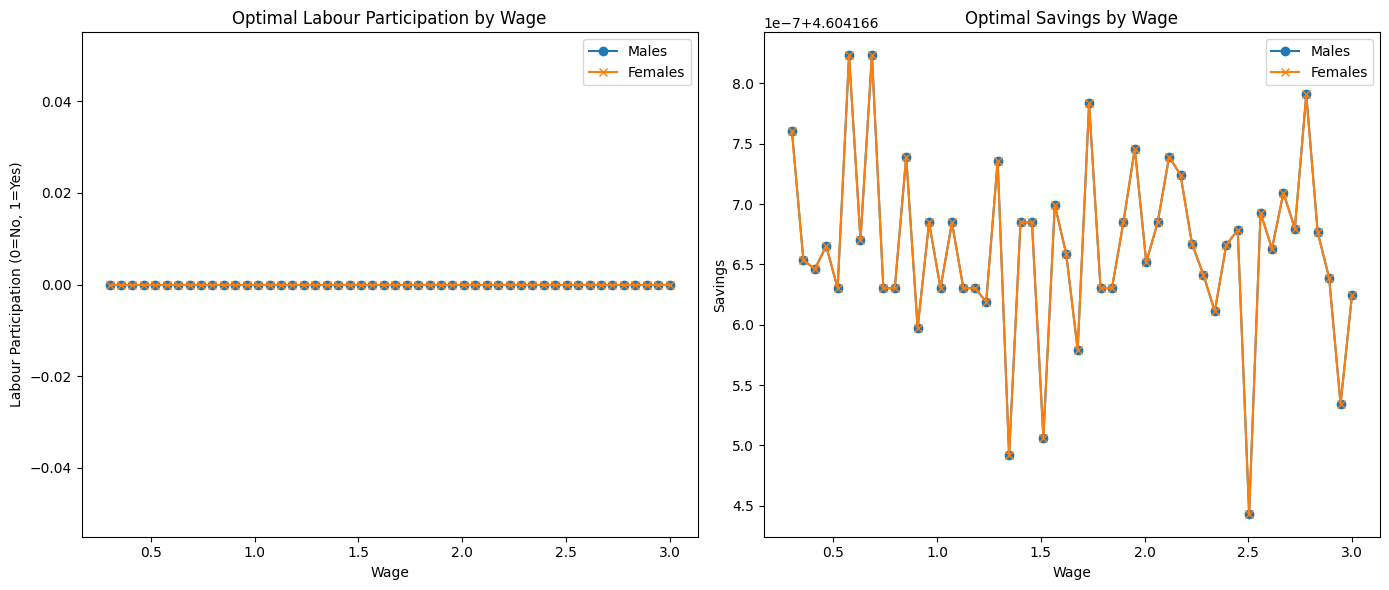

In [87]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

λ_f = 0.5
λ_m = 1 - λ_f

def utility_married(c_m, c_f, l_m, l_f, η_m, η_f, λ_m, λ_f):
    return λ_f * (np.log(c_f) - η_f * l_f) + λ_m * (np.log(c_m) - η_m * l_m)

def objective(params, w_f, w_m, y_0f, y_1f, y_1m, ψ, r, η_f, η_m, l_m):
    c_0, c_1f, c_1m, a_1f, l_f = params
    answer = -utility_married(c_1m, c_1f, l_m, l_f, η_m, η_f, λ_m, λ_f)
    return answer

def married_budget_constraints(params, w_f, w_m, y_0f, y_1f, y_1m, ψ, r, l_m):
    c_0, c_1f, c_1m, a_1f, l_f = params
    return [
        c_0 + a_1f - y_0f,  # Budget constraint at t=0
        c_1f + c_1m + ψ * l_f - (w_f * l_f + y_1m + y_1f + (1 + r) * a_1f)  # Budget constraint at t=1
    ]


def solve_optimization(w_f, w_m, y_0f, y_1f, y_1m, ψ, r, l_m, η_f, η_m):
    initial_guess = [y_0f / 2, y_1f / 2, y_1m / 2, 0, 0.5]
    bounds = [(0, None), (0, None), (0, None), (None, None), (0, 1)]  # l_f bounded between 0 and 1

    result = minimize(
        objective,
        initial_guess,
        args=(w_f, w_m, y_0f, y_1f, y_1m, ψ, r, η_f, η_m, l_m),
        constraints={'type': 'eq', 'fun': married_budget_constraints, 'args': (w_f, w_m, y_0f, y_1f, y_1m, ψ, r, l_m)},
        bounds=bounds
    )
    return result.x if result.success else None

def determine_labour_participation(w_f, w_m, y_0f, y_1f, y_1m, ψ, r, η_f, η_m):
    solution_work = solve_optimization(w_f, w_m, y_0f, y_1f, y_1m, ψ, r, 1, η_f, η_m)
    solution_nowork = solve_optimization(w_f, w_m, y_0f, y_1f, y_1m, ψ, r, 0, η_f, η_m)
    utility_work = -objective(solution_work, w_f, w_m, y_0f, y_1f, y_1m, ψ, r, η_f, η_m, 1)  
    utility_nowork = -objective(solution_nowork, w_f, w_m, y_0f, y_1f, y_1m, ψ, r, η_f, η_m, 0)  
    return utility_work > utility_nowork, solution_work if utility_work > utility_nowork else solution_nowork

wage_grid = np.linspace(0.3, 3, 50)

# Arrays to store optimal labour participation and savings for each gender
optimal_labour_m = np.zeros_like(wage_grid)
optimal_savings_m = np.zeros_like(wage_grid)
optimal_labour_f = np.zeros_like(wage_grid)
optimal_savings_f = np.zeros_like(wage_grid)

# Simulation for males
for i, wage in enumerate(wage_grid):
    # labour_decision, solution = determine_labour_participation(wage, wage, 1, 1, 1, 1, 0.05, 1, 1)
    labour_decision, solution = determine_labour_participation(wage, wage, y_0f, y_1f, y_1m, ψ, r, η_f, η_m)
    optimal_labour_m[i] = labour_decision
    optimal_savings_m[i] = solution[2]  # a1 is the third element in the solution vector

# Simulation for females
for i, wage in enumerate(wage_grid):
    labour_decision, solution = determine_labour_participation(wage, wage, y_0f, y_1f, y_1m, ψ, r, η_f, η_m)
    optimal_labour_f[i] = labour_decision
    optimal_savings_f[i] = solution[2]

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for optimal labour participation
plt.subplot(1, 2, 1)
plt.plot(wage_grid, optimal_labour_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_labour_f, label='Females', marker='x')
plt.title('Optimal Labour Participation by Wage')
plt.xlabel('Wage')
plt.ylabel('Labour Participation (0=No, 1=Yes)')
plt.legend()

# Plot for optimal savings
plt.subplot(1, 2, 2)
plt.plot(wage_grid, optimal_savings_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_savings_f, label='Females', marker='x')
plt.title('Optimal Savings by Wage')
plt.xlabel('Wage')
plt.ylabel('Savings')
plt.legend()

plt.tight_layout()
plt.show()


From the graph it appears to suggest female participation is always zero no matter what the wage is. And optimal savings appear to be random, this is not what I would have expected.

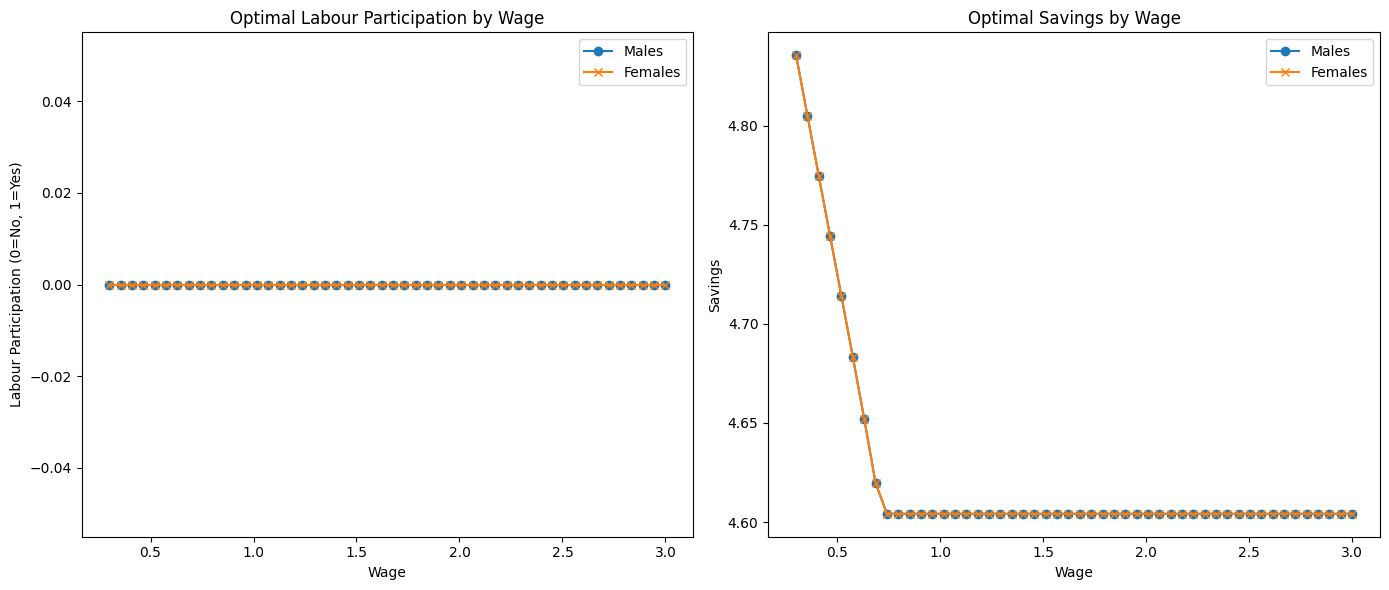

In [88]:
wpsi_grid = np.linspace(0.1, 1, 50)

optimal_labour_m = np.zeros_like(wpsi_grid)
optimal_savings_m = np.zeros_like(wpsi_grid)
optimal_labour_f = np.zeros_like(wpsi_grid)
optimal_savings_f = np.zeros_like(wpsi_grid)

# Simulation for males
for i, wpsi in enumerate(wpsi_grid):
    labour_decision, solution = determine_labour_participation(wage, wage, y_0f, y_1f, y_1m, wpsi, r, η_f, η_m)
    optimal_labour_m[i] = labour_decision
    optimal_savings_m[i] = solution[2]  

# Simulation for females
for i, wpsi in enumerate(wpsi_grid):
    labour_decision, solution = determine_labour_participation(wage, wage, y_0f, y_1f, y_1m, wpsi, r, η_f, η_m)

    #labour_decision, solution = determine_labour_participation(wage, wage, 1, 1, 1, 1, 0.05, 1, 1)
    optimal_labour_f[i] = labour_decision
    optimal_savings_f[i] = solution[2]

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for optimal labour participation
plt.subplot(1, 2, 1)
plt.plot(wage_grid, optimal_labour_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_labour_f, label='Females', marker='x')
plt.title('Optimal Labour Participation by Wage')
plt.xlabel('Wage')
plt.ylabel('Labour Participation (0=No, 1=Yes)')
plt.legend()

# Plot for optimal savings
plt.subplot(1, 2, 2)
plt.plot(wage_grid, optimal_savings_m, label='Males', marker='o')
plt.plot(wage_grid, optimal_savings_f, label='Females', marker='x')
plt.title('Optimal Savings by Wage')
plt.xlabel('Wage')
plt.ylabel('Savings')
plt.legend()

plt.tight_layout()
plt.show()


This graph agains shows no female participation no matter what the wage is, and optimal savings initially decreasing up until a wage of about 0.8 then it is constant. 

This code output is not what I expected and I believe is wrong and does not properly answer the question, however I have been working on it for a long time and it is quite late. If I had more time I would make sure that the constraints are working as I wanted to and the minimisation is successful. Additionally, I would add an if statement checking whether the utility from working is greater than the utility of not working before adding it to the list.

## Question 4

I was not too sure on how to answer this question but this is what I would have tried if I had more time.

First, define any relevant model parameters such as wages, utility parameters, and the reform factor ψ. Next, a utility function is implemented to capture individual preferences considering consumption, leisure, and other factors. Subsequently, budget constraints for both pre-reform and post-reform scenarios are established, reflecting income, wages, and financial aspects. An optimisation problem is then formulated to determine optimal female labor participation, maximising utility subject to budget constraints. Using an optimisation algorithm like scipy.optimize.minimize, this problem is solved for both scenarios. Plotting the results allows for visualising how the reform affected female labor participation across a range of male wages. Finally, welfare gains are computed by comparing total utility in the post-reform world to that in the pre-reform world, providing insights into the policy's impact on individual welfare.